# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10,18,60]
#[10,2,60]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,18601,6327,10099,2205,2767,3181
2,8590,3045,7854,96,4095,225


In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer: Using the data from the statistical analysis: The Fresh catagory 50% is 8,504; Milk 3,627; Grocery 4,755;Frozen 1526; Detergents_paper 816.5; Delicatessen 965.5. 
Customer 0 has the highest level of detergents_paper,Frozen and grocery with the lowest Fresh I would suspect this is a retailer
Customer 1 has the highest level of Fresh and Milk I would suspect this is a market
Customer 2 has the lowest level of delicatessen and lowest frozen I would suspect this is a cafe. Created a basic matrix below as a guide using the statistics table and I I feel would be a match for the type of establishment

|blank|cafe|Market|Retailer|
|-----|:---------:|:--------:|-----:|
|Fresh|average|high|low|
|Milk|average|high |high|
|Grocery|low|high|high|
|Frozen|low |high|low|
|detergents|low|average|high|
|delicatessen|low|high|low|

**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [8]:

def predict_feature(feature):
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

    new_data = data.drop([feature], axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=1)

# TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("The score for {:16} is {:+.5f}".format(feature, score))

for feature in data.columns.values:
    predict_feature(feature)

The score for Fresh            is -0.92337
The score for Milk             is +0.51585
The score for Grocery          is +0.79577
The score for Frozen           is -0.64957
The score for Detergents_Paper is +0.81524
The score for Delicatessen     is -0.42913


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer: Looking at the scores for all the features, the two highest would be detergents_paper at 0.81524 r2 followed by grocery at 0.79577. It appears detergents_paper has the highest coefficient of determination and should be held out to predict spending habits.  **

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\angie\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


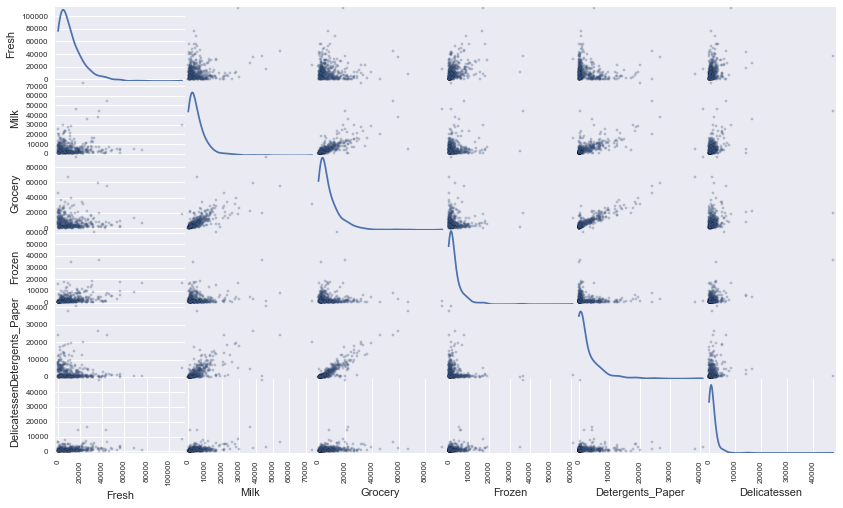

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer: The data points in general appear to positive skewed or right skewed with a gaussian distribuition not a normal distribution. The strongest linear correlation does appear to be between detergents_paper and grocery which aligns with the r2 calculations above.**

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

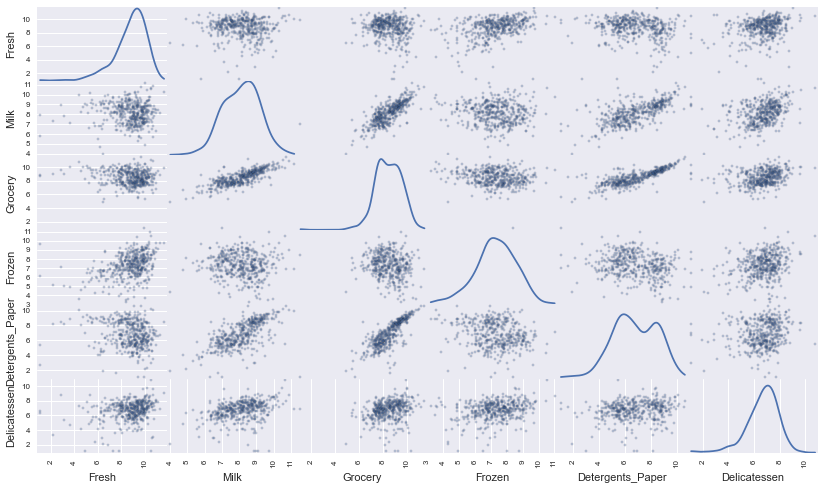

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = pd.DataFrame(log_data.loc[indices], columns = data.keys()).reset_index(drop = True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,9.830971,8.752581,9.220192,7.698483,7.925519,8.064951
2,9.058354,8.021256,8.968778,4.564348,8.317522,5.416100


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove

outliers = [65,66,81,75,154,161,128]


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer: I choose to remove the outliers from the high correlation data features grocery and detergents_paper and also a couple of data points that appeared to show up on more than one feature set such as 65 and 128. My reasoning was the higher the accuracy of my correlation objects the better performanceand removing outliers that may be causing increased noise in multiple data sets of features should also be removed to help increase accuracy in training and prediction. It would be nice to have a line of code that could collate these outliers into one array to pass to outliers instead of visually searching for them. This would also be beneficial to analysizing the outliers in other datasets where removing the outliers may not be the best option if they are not coundounders but contain valuable insights as to their reason for being an outlier that can affect the interpretation of the data. **

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
import sklearn.decomposition
from sklearn.decomposition import PCA

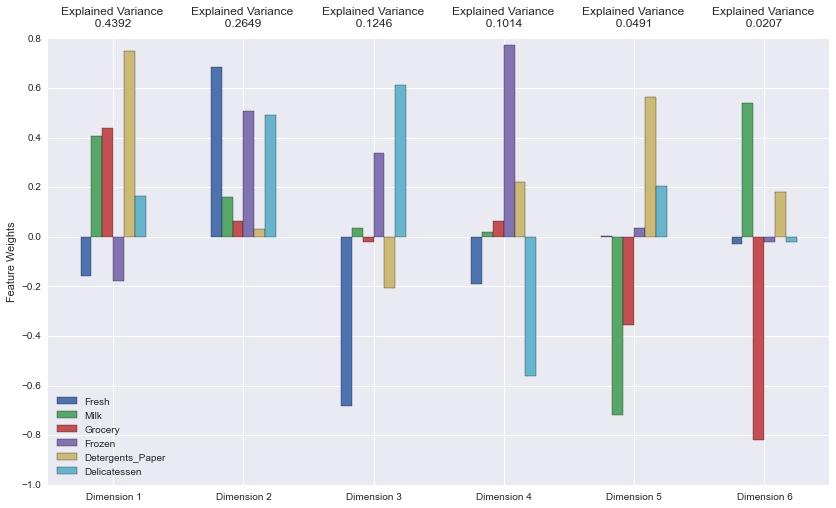

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer: The dimensions calculated are representations of patterns of spending. The first and second principal component explain (0.4341 + 0.2712)= 0.7053=70% of the variance in the data. The first four principal compaonents explain (0.4341+0.2712+0.1237+0.1011)= 0.9301=93 % of the variance.
The first dimension best represents anestablishment whose main spending is on detergents_paper, also purchases grocery,milk and a smaller amount of delicatessen. It would not be worth marketing frozen or fresh goods to this establishment as noted by the negative weights in tese catagories. "The first principal component is made up of large positive weights in Detergents_Paper, and lesser but still sizeable positive weights on Grocery and Milk. It also correlates with a decrease in Fresh and Frozen. This pattern might represent spending in household staples products that are purchased together."
The first component shows that we have a lot of variance in customers who purchase Milk, Grocery and Detergents_Paper — some purchase a lot of these 3 categories while others purchase very little.
The second dimension represents an establishment that purchases all the goods sold however Fresh is the strongest marketing target followed by delicatessen and frozen goods. Less marketing power should be directed towards detergents_paper and grocery for this establishment because they are purchased to a lesser degree.
The third diemsion represents an establishment that spends heavily on fresh and detergent_paper to a lesser degree. Less marketing should be spent on tageting delicatessen and frozen to this establishment as discussed in the above reasoning .
The forth dimension represents an establishment with high frozen expenditure, here less money should be targeted towards marketing this establishment delicatessen and fresh because they have a negative correlation for this . their next highest purchses are detergents_paper.

The data can be viewed in two business aspects by identifying establishments that fit the feature dimension representations corporate can identify where to target marketing dollars to companion sales based upon the main variance feature and use the data to determine where the marketing dollars may not be as effective based upon negative variance to that dimensional category of establishment**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0838,0.6656,0.8756,1.0004,0.5636,-0.2515
1,1.4147,1.7689,0.0144,-0.3781,0.2115,-0.1475
2,1.5403,-1.7716,-2.2380,-1.1084,0.3837,-0.1244


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0838,0.6656
1,1.4147,1.7689
2,1.5403,-1.7716


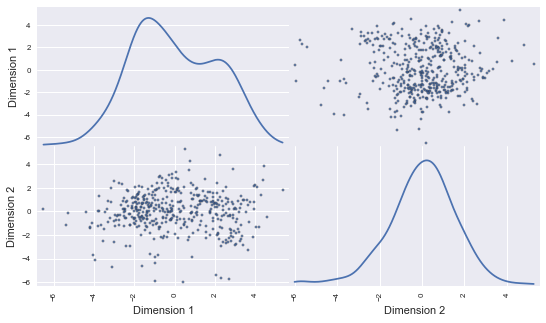

In [19]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer: Information obtained from the sklearn docs http://scikit-learn.org/stable/modules/clustering.html#k-means A K-means clustering algorithm clusters data by separating samples in n groups of equal variance and it seeks to minimize inertia which is how internally coherent clusters are (zero is optimal). The algorithm scales well. weaknesses are that it performs poorly on clusters that are elongated or irregularly shaped.Euclidian distances can become inflated in high dimensional space and running PCA can help to overcome this weakness because inertia is not normalized within the algorithm.
Gaussian Mixtures Models (GMM) are not scalable, require many parameters and are good for density estimation. They can draw confidence elipsoids for multivariate models. GMMs do not bias the clusters to fit expected parameters, it will remain true to the data and is one of the fastest clustering models for learning mixture models. The disadvantages are the algorithm can diverge and find solutions with infinite likelihood. The algorithm will use all cmponents it has access to without external clues. Given the observations of the data thus far and the fact that PCA has already been run on the data as well I think both may perform well, however because it appears that the PCA results seem to lean towards K-Means not having the diifculty with arbitrary boundaries which is the major decision choice between the two gien this dataset. I will choose to use K-Means clustering. Because the data is normalized, the data is not elongated and the algorithm is known to perform well and scale.   **

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GMM
import numpy as np
import pandas as pd
from numpy import meshgrid

In [22]:
#quick code to test for clusters implementation
import time
n_clusters = 6
start = time.time()
clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
end = time.time()
print "You have clusters!\nTraining time (secs): {:.3f}".format(end - start)
print clusters

You have clusters!
Training time (secs): 0.338
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GMM
import numpy as np
import pandas as pd
from numpy import meshgrid


pseudo code help from forums to decifer cell 136
scores = list  
for n_clusters in number_of_clusters_list:  
    create the clusterer with n_clusters  
    fit the clusterer to the reduced data
    preds = clusterer.predict(reduced_data)
    scores.append(silhouette_score(reduced_data, preds)) 

In [24]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
# TODO: Predict the cluster for each data point
# TODO: Predict the cluster for each transformed sample data point
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

#preds = clusters.predict(pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])  
scores = [2,3,4,5,6]
for n_clusters in scores:
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',random_state=10 ).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    silScore = silhouette_score(reduced_data, preds)
    print ("cluster number",n_clusters, "the score is",silScore)                    


('cluster number', 2, 'the score is', 0.42603583444758714)
('cluster number', 3, 'the score is', 0.39431492168504656)
('cluster number', 4, 'the score is', 0.33179229703918511)
('cluster number', 5, 'the score is', 0.35413467507110197)
('cluster number', 6, 'the score is', 0.36650037766216098)


In [26]:
# TODO: Find the cluster centers
centroids = clusters.cluster_centers_ # test run to find centers alone to determine errors from code above
print centroids

[[-0.28210283  2.18357984]
 [-1.55279919 -3.22725737]
 [ 2.52513306 -2.20541446]
 [-0.02119627 -0.27889949]
 [-2.25277927  0.09823198]
 [ 2.50524413  0.77849332]]


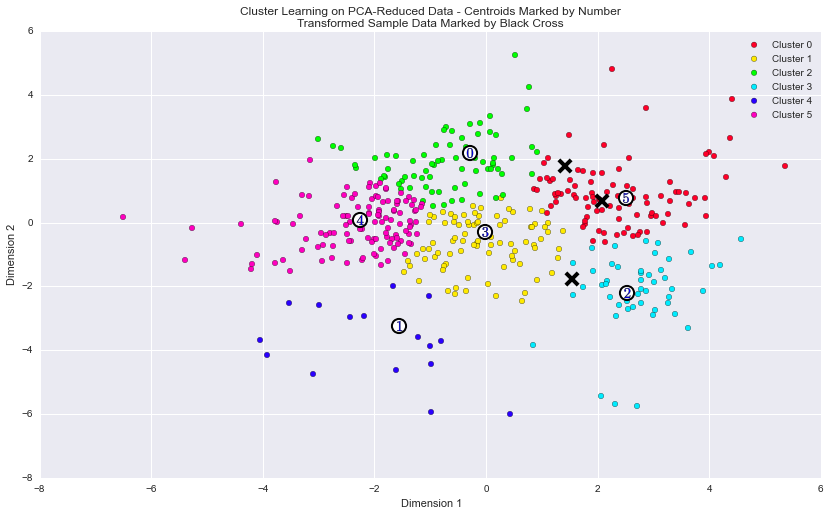

In [27]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centroids, pca_samples)

In [38]:

# TODO: Apply your clustering algorithm of choice to the reduced data 
# TODO: Predict the cluster for each data point
# TODO: Predict the cluster for each transformed sample data point
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

#preds = clusters.predict(pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])  
scores = [2]
for n_clusters in scores:
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',random_state=10 ).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    silScore = silhouette_score(reduced_data, preds)
    print ("cluster number",n_clusters, "the score is",silScore)                    


('cluster number', 2, 'the score is', 0.42603583444758714)


In [39]:
# TODO: Find the cluster centers
centroids = clusters.cluster_centers_ # test run to find centers alone to determine errors from code above
print centroids

[[-0.28210283  2.18357984]
 [-1.55279919 -3.22725737]
 [ 2.52513306 -2.20541446]
 [-0.02119627 -0.27889949]
 [-2.25277927  0.09823198]
 [ 2.50524413  0.77849332]]


In [40]:
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusters.predict(reduced_data)
print sample_preds

[5 5 5 0 0 3 3 5 3 5 5 3 5 5 5 3 2 3 5 3 3 4 0 5 5 2 4 4 5 0 5 3 3 0 1 2 0
 5 2 4 0 0 2 2 2 5 5 5 5 5 4 2 3 2 4 3 5 2 4 2 2 5 5 5 3 5 3 3 4 0 3 0 5 3
 5 4 3 3 5 4 3 5 5 0 4 0 4 0 5 4 2 1 2 1 1 4 5 5 5 0 3 4 2 5 2 2 4 5 0 0 4
 4 4 3 4 4 4 4 4 3 0 0 4 5 4 4 1 3 4 4 4 5 1 3 3 0 4 4 4 3 5 4 3 4 4 4 3 4
 3 2 5 4 5 2 5 4 5 3 5 5 3 4 4 2 2 2 2 1 2 0 4 4 3 5 0 2 0 1 4 4 2 5 2 4 4
 4 2 4 0 0 5 3 3 5 5 0 1 4 2 4 3 3 5 4 5 4 5 2 5 2 4 2 4 4 2 4 3 4 3 5 4 1
 0 0 3 4 1 0 3 4 4 4 0 0 4 4 3 5 5 4 4 3 3 4 5 4 3 0 4 3 3 0 0 3 4 4 3 2 0
 5 0 5 4 4 4 1 0 3 1 0 4 4 5 4 5 0 0 0 4 3 0 4 4 3 4 3 5 3 3 0 3 5 1 5 5 2
 2 2 2 5 4 4 2 4 4 2 4 3 5 4 3 3 5 3 4 3 3 4 0 4 1 0 3 4 5 4 5 0 5 4 4 1 3
 2 5 2 2 4 2 5 5 3 5 4 5 1 2 0 1 4 2 3 1 4 4 1 3 4 5 4 4 4 4 0 0 3 5 4 1 5
 4 4 2 4 4 0 3 0 4 3 4 4 4 4 4 1 0 4 4 5 4 4 4 4 4 4 3 0 4 0 5 3 0 3 3 2 0
 3 5 5 5 2 3 2 5 3 3 3 4 5 0 3 4 3 0 3 3 3 0 4 5 4 1]


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer: The best silhouette score is from cluster with a number of two. The scores are:
('cluster number', 2, 'the score is', 0.42603583444758714)
('cluster number', 3, 'the score is', 0.39431492168504656)
('cluster number', 4, 'the score is', 0.33179229703918511)
('cluster number', 5, 'the score is', 0.35413467507110197)
('cluster number', 6, 'the score is', 0.36650037766216098) **

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

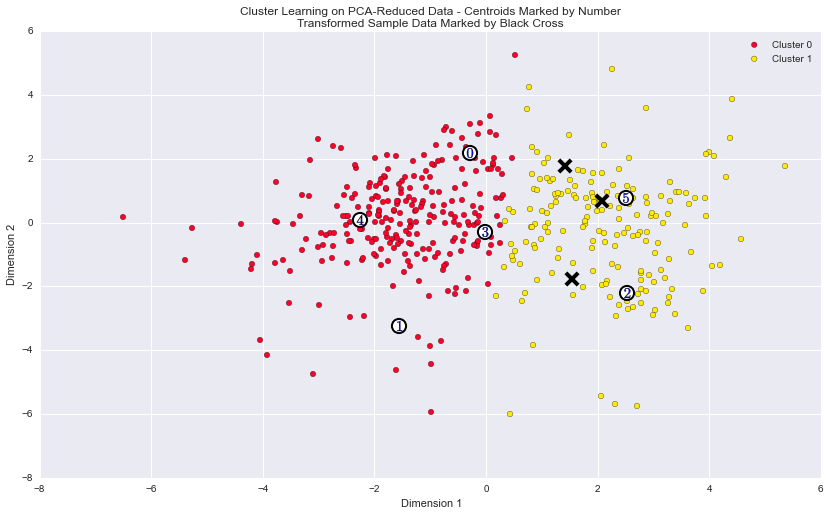

In [41]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centroids, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [58]:
centroids = clusters.cluster_centers_ 
scores = [2]
for n_clusters in scores:
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',random_state=10 ).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    silScore = silhouette_score(reduced_data, preds)
    print ("cluster number",n_clusters, "the score is",silScore)                    

# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centroids)
#inv_logit[np.log]
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centroids))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

('cluster number', 2, 'the score is', 0.42603583444758714)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,30227,4318,4820,4850,784,2250
Segment 1,901,1071,1951,391,256,129
Segment 2,953,6606,12458,318,5577,418
Segment 3,5350,3217,4615,1328,882,703
Segment 4,9863,1384,1776,2392,168,584
Segment 5,7415,10642,14957,1449,6029,1797


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer: Based upon the earlier analysis it is most likely that the two clusters represented in the visual of cell 152 are grocery and detergents_paper as we determined earlier using PCA and Box-Cox feature scaling. Here we find segment 5 has the highest purchase of fresh compared with the statistical analysis displayed again below which is between 75% and max of fresh spending; Segment three has the highest in Milk which is just above 75% in milk statistics; segment three also has the highest in grocery just over 75% that catagorical spending.Frozen segment five has the highest spending and the statistical data shows that is over 75% of the statistical spending. For the catagory detergents_paper the highest catagory of spending is in segment two and staistically that is between 75% and max last delicatessen is segment 5 and just over 75% of the statistical purchases. The metric that is missing is the data on spending based upon enterprise type in order to scientifically correlate the segments with the enterprise type acurrately. Any other means of identifying the enterprise is guessing/surmissing the correlation. The best that can be reported is the segment spending data with the analysis from the other cells and alllowing marketing to make projections on targets based upon enterprise names/types since we are not given those variables. The analysis based upon customer assigned to cluster x should best identify with establishments represented by feature of segment x is challenging because the clusters poorly seperated represented by the low silhouette scores (The scores are: ('cluster number', 2, 'the score is', 0.42603583444758714) ('cluster number', 3, 'the score is', 0.39431492168504656) ('cluster number', 4, 'the score is', 0.33179229703918511) ('cluster number', 5, 'the score is', 0.35413467507110197) ('cluster number', 6, 'the score is', 0.36650037766216098) and confirmed by the visual in cell 152. Cluster one aligns with segments 2 and 3 and cluster 0 aligns with segments 0,1,4 and 5.An example of application of this information would be marketing can consider enterprises with high grocery (segment 2 highest sales) may also benefit from additional marketing of milk which is the second highest in segment three etc. Making the analysis in this manner does not depend upon the missing variable of enterprise name market cafe or retailer.

Addition after review: The centers here named centroids( which are the "X" on the visualizations, appear to cluster in 2 clusters even in the 6 cluster visualization and 2 of the 3 are in one cluster in the 2 cluster visualization. which is consistent with the findings enumerated above. That the PCA and Box-Cox were correct in identifying 2 major clusters **

In [43]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [37]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 5
Sample point 1 predicted to be in Cluster 5
Sample point 2 predicted to be in Cluster 5
Sample point 3 predicted to be in Cluster 0
Sample point 4 predicted to be in Cluster 0
Sample point 5 predicted to be in Cluster 3
Sample point 6 predicted to be in Cluster 3
Sample point 7 predicted to be in Cluster 5
Sample point 8 predicted to be in Cluster 3
Sample point 9 predicted to be in Cluster 5
Sample point 10 predicted to be in Cluster 5
Sample point 11 predicted to be in Cluster 3
Sample point 12 predicted to be in Cluster 5
Sample point 13 predicted to be in Cluster 5
Sample point 14 predicted to be in Cluster 5
Sample point 15 predicted to be in Cluster 3
Sample point 16 predicted to be in Cluster 2
Sample point 17 predicted to be in Cluster 3
Sample point 18 predicted to be in Cluster 5
Sample point 19 predicted to be in Cluster 3
Sample point 20 predicted to be in Cluster 3
Sample point 21 predicted to be in Cluster 4
Sample point 22 pred

In [35]:
for i, segments in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in segment", segments

Sample point 0 predicted to be in segment 5
Sample point 1 predicted to be in segment 5
Sample point 2 predicted to be in segment 5
Sample point 3 predicted to be in segment 0
Sample point 4 predicted to be in segment 0
Sample point 5 predicted to be in segment 3
Sample point 6 predicted to be in segment 3
Sample point 7 predicted to be in segment 5
Sample point 8 predicted to be in segment 3
Sample point 9 predicted to be in segment 5
Sample point 10 predicted to be in segment 5
Sample point 11 predicted to be in segment 3
Sample point 12 predicted to be in segment 5
Sample point 13 predicted to be in segment 5
Sample point 14 predicted to be in segment 5
Sample point 15 predicted to be in segment 3
Sample point 16 predicted to be in segment 2
Sample point 17 predicted to be in segment 3
Sample point 18 predicted to be in segment 5
Sample point 19 predicted to be in segment 3
Sample point 20 predicted to be in segment 3
Sample point 21 predicted to be in segment 4
Sample point 22 pred

**Answer: If my code is correct then the segments are identical to the cluster numbers by sample number. I suspect there might be a serious error in my code because I find this exact match hard to believe in spite of the calculation results**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer: You could use the customer segmentation as the basis of the A/B marketing structure. You could segment the enterprises which are marketed to into the 2 clustered sgments that had the highest degree of clustering detergents_paper and grocery. Both catergories would receive equally 5 days and 3 days a week delivery. Followed by running A/B tests to determine if there was a statistical difference in preference for the frequency of delivery and if that statistical difference can be stratified by cluster difference Equally the same analysis can be run on using all 6 clusters depending on the manpower and degree of effort to be assigned to the task **

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer: I would conside the target variable to be customer spending. Create a trained model on the current data and then label and run the new customers data as the "test" dataset. There was a very inetereting discussion on this in stack overflow with a question based upon using R. here is the validated answer:
http://stackoverflow.com/questions/21064315/how-do-i-predict-new-datas-cluster-after-clustering-training-data

"Clustering is not supposed to "classify" new data, as the name suggests - it is the core concept of classification.

Some of the clustering algorithms (like those centroid based - kmeans, kmedians etc.) can "label" new instance based on the model created. Unfortunately hierarchical clustering is not one of them - it does not partition the input space, it just "connects" some of the objects given during clustering, so you cannot assign the new point to this model.

The only "solution" to use the hclust in order to "classify" is to create another classifier on top of the labeled data given by hclust. For example you can now train knn (even with k=1) on the data with labels from hclust and use it to assign labels to new points."
Forums answer:"if we use the information taken from the clustering as a new feature, we can then use this feature as, say, the target variable (to say that one cluster has a certain delivery schedule or label, or whatnot) to use a supervised learner to successfully predict that target variable for new customers."   I think all the above echoes what I stated in the opening sentence of using the current trained unsupervised model (customer spending clustering as the target variable) and create a supervised model to predict the delivery schedule of the new customer based upon their spending or input the delivery and predict the spending.  **

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

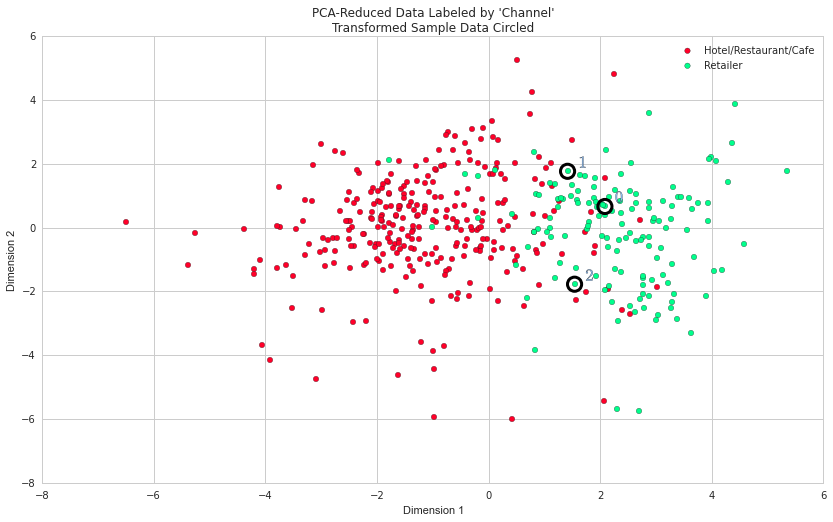

In [169]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer: The clustering appears very similar to the 2 cluster model in cell 152 in comparison. There does appear to be customer segments that would be classified as purely "Retailers" or "Hotels/Restaurants/Cafes" by this distribution. I would consider these classifications consistant with my previous definition of customer segments based upon the 2 cluster model of what appears to be detergent_paper and Grocery.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.